## Zoo Dataset Using Knn Neighbor
Identify at least 1 famous data repositories where datasets for different machine learning exercises are available. Pick any one classification dataset from among these repositories and fit in a KNN classifier on your dataset. Report the accuracy of the model for different values of N (Neighbors).


In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

##  Dataset: Zoo Dataset – Variable Description  

| Variable Name | Role     | Type        | Description                           |
|---------------|----------|-------------|---------------------------------------|
| animal_name   | ID       | Categorical | Name of the animal                    |
| hair          | Feature  | Binary      | Presence of hair (1 = Yes, 0 = No)    |
| feathers      | Feature  | Binary      | Presence of feathers (1 = Yes, 0 = No)|
| eggs          | Feature  | Binary      | Whether animal lays eggs              |
| milk          | Feature  | Binary      | Whether animal produces milk          |
| airborne      | Feature  | Binary      | Ability to fly                        |
| aquatic       | Feature  | Binary      | Ability to live in water              |
| predator      | Feature  | Binary      | Is a predator                         |
| toothed       | Feature  | Binary      | Has teeth                             |
| backbone      | Feature  | Binary      | Has backbone (vertebrate)             |


In [14]:
df = pd.read_csv('Data_sets/zoo.data')
df.columns = [
    "animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic",
    "predator", "toothed", "backbone", "breathes", "venomous", "fins",
    "legs", "tail", "domestic", "catsize", "class_type"
]
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [15]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [16]:
df.shape

(100, 18)

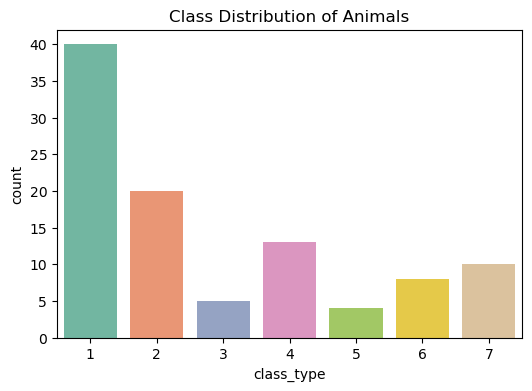

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="class_type", data=df, palette="Set2")
plt.title("Class Distribution of Animals")
plt.show()

In [18]:
X = df[['hair', 'feathers', 'eggs', 'milk', 'airborne','aquatic', 'predator', 'toothed',
          'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']]
y = df[['class_type']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Step 8: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Step 9: Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # default k=5
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
y_pred = knn.predict(X_test_scaled)

# Step 11: Evaluation
print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))


🎯 Accuracy: 0.8


In [23]:
for k in [3,5,7,9,11]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    print(f"K={k}, Accuracy={accuracy_score(y_test, y_pred):.2f}")


K=3, Accuracy=0.90
K=5, Accuracy=0.80
K=7, Accuracy=0.70
K=9, Accuracy=0.70
K=11, Accuracy=0.60


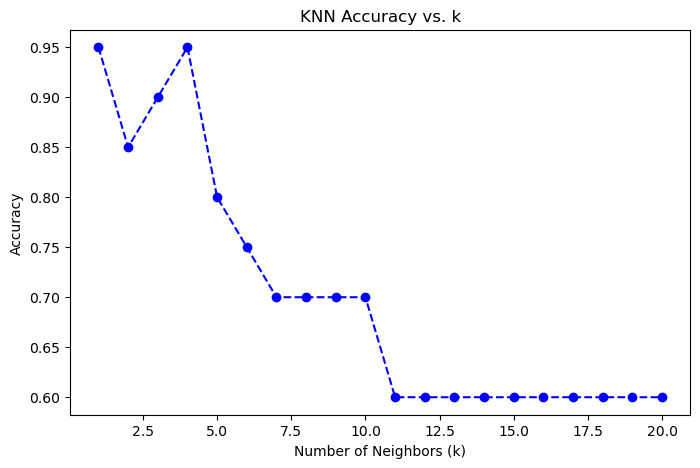

In [24]:
# Step 12: Accuracy for different K values
acc_scores = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc_scores.append(accuracy_score(y_test, preds))

plt.figure(figsize=(8,5))
plt.plot(k_values, acc_scores, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.show()